In [1]:
import cv2 as cv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
import glob
from collections import defaultdict
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix 


# Testing Image for Different Features

(6000, 4000, 3)


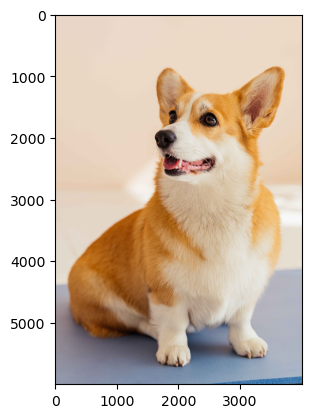

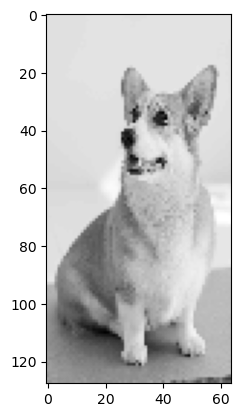

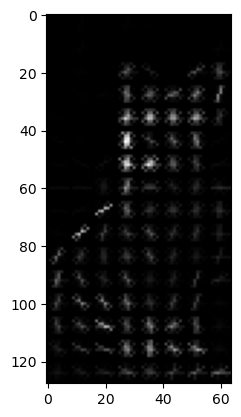

In [3]:

imgs = np.array(cv.imread('./corgi.jpg'))
rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
resize_img = cv.resize(rgb,(64,128))
gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
feature , hog_img= hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)
avg_color = np.average(resize_img, axis=0)
R,G,B = np.average(avg_color, axis=0)
print(imgs.shape)
plt.imshow(rgb)
plt.show()
plt.imshow(gray, cmap="gray")
plt.show() 
plt.imshow(hog_img,cmap="gray")
plt.show() 

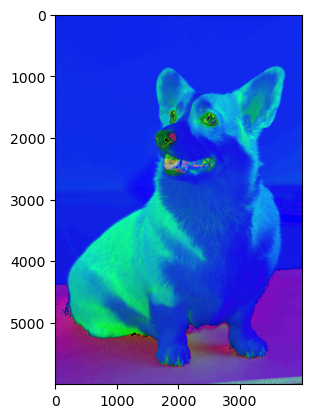

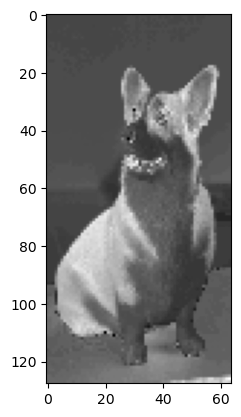

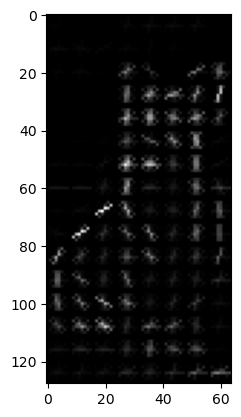

In [4]:
hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)
resize_img = cv.resize(hsv,(64,128))
gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
feature , hog_img= hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True,channel_axis = None)
plt.imshow(hsv)
plt.show()
plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(hog_img,cmap="gray")
plt.show()

136
255
204.0


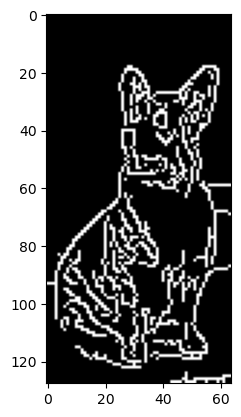

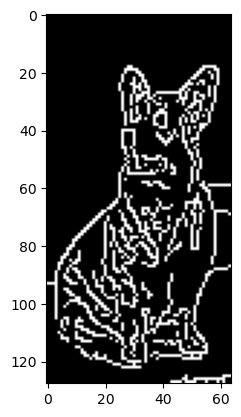

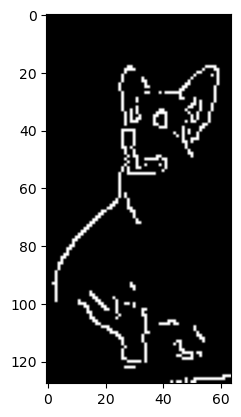

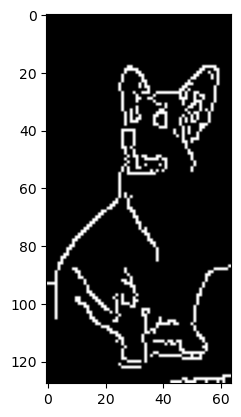

' cv.imshow("Wide Edge Map", wide)\ncv.imshow("Mid Edge Map", mid)\ncv.imshow("Tight Edge Map", tight)\ncv.waitKey(10000) \ncv.destroyAllWindows()\ncv.waitKey(50) '

In [5]:

def auto_canny(imgs, sigma=0.15):
	# find the median
	median_pixel = np.median(imgs)
	# auto Canny
	lower = int(max(0, (1.0 - sigma) * median_pixel))
	upper = int(min(255, (1.0 + sigma) * median_pixel))
	edge_value = cv.Canny(imgs, lower, upper)
	# return the edged image
	return edge_value,lower,upper,median_pixel

 
gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
blurred = cv.GaussianBlur(gray,(7,7),0)
resize_img = cv.resize(blurred,(64,128))

auto,lower,upper,median_pixel = auto_canny(resize_img,sigma=0.33)
wide = cv.Canny(resize_img, 10, 200)
mid = cv.Canny(resize_img, 50, 120)
tight = cv.Canny(resize_img, 240, 250)

print(lower)
print(upper)
print(median_pixel)
plt.imshow(wide,cmap="gray")
plt.show() 
plt.imshow(mid,cmap="gray")
plt.show() 
plt.imshow(tight,cmap="gray")
plt.show() 
plt.imshow(auto,cmap="gray")
plt.show() 
""" cv.imshow("Wide Edge Map", wide)
cv.imshow("Mid Edge Map", mid)
cv.imshow("Tight Edge Map", tight)
cv.waitKey(10000) 
cv.destroyAllWindows()
cv.waitKey(50) """

---------
# Data Augmentation

### Add Noise & Rotation

#### Sapmple Images

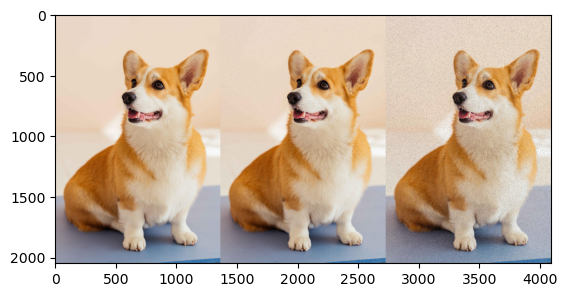

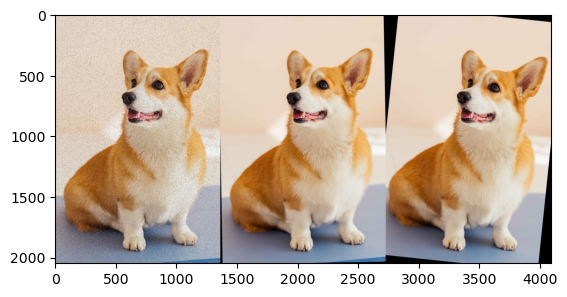

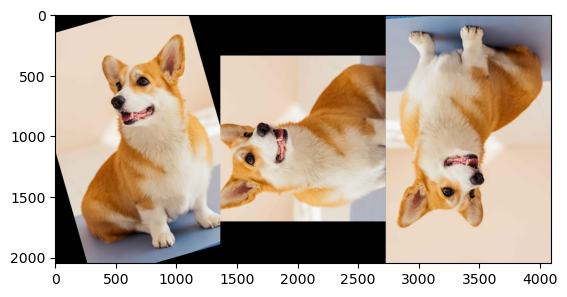

In [6]:
imgs1 = np.array(cv.imread('./Testing_Image//corgi1.jpg'))
rgb1 = cv.cvtColor(imgs1, cv.COLOR_BGR2RGB)
imgs2 = np.array(cv.imread('./Testing_Image//corgi2.jpg'))
rgb2 = cv.cvtColor(imgs2, cv.COLOR_BGR2RGB) 
imgs3 = np.array(cv.imread('./Testing_Image//corgi3.jpg'))
rgb3 = cv.cvtColor(imgs3, cv.COLOR_BGR2RGB) 
imgs4 = np.array(cv.imread('./Testing_Image//corgi4.jpg'))
rgb4 = cv.cvtColor(imgs4, cv.COLOR_BGR2RGB) 
imgs5 = np.array(cv.imread('./Testing_Image//corgi5.jpg'))
rgb5 = cv.cvtColor(imgs5, cv.COLOR_BGR2RGB) 
imgs6 = np.array(cv.imread('./Testing_Image//corgi6.jpg'))
rgb6 = cv.cvtColor(imgs6, cv.COLOR_BGR2RGB) 
imgs7 = np.array(cv.imread('./Testing_Image//corgi7.jpg'))
rgb7 = cv.cvtColor(imgs7, cv.COLOR_BGR2RGB) 
imgs8 = np.array(cv.imread('./Testing_Image//corgi8.jpg'))
rgb8 = cv.cvtColor(imgs8, cv.COLOR_BGR2RGB) 
imgs9 = np.array(cv.imread('./Testing_Image//corgi9.jpg'))
rgb9 = cv.cvtColor(imgs9, cv.COLOR_BGR2RGB) 

add = cv.hconcat([rgb1, rgb2, rgb3])
add1 = cv.hconcat([rgb4, rgb5, rgb6])
add2 = cv.hconcat([rgb7, rgb8, rgb9])

plt.imshow(add)
plt.show()
plt.imshow(add1)
plt.show()
plt.imshow(add2)
plt.show()

-----------
# Feature Extraction

In [7]:
# Corgi = 0, German = 1, Golden = 2

# Load Infomation into list
df_dict = defaultdict(list)

def toDict(file_name,classes,height,width,d,R,G,B):
    df_dict['file_name'].append(file_name)
    df_dict['height'].append(height)
    df_dict['width'].append(width)
    df_dict['resolution'].append(height*width)
    df_dict['dimension'].append(d)
    df_dict['R'].append(R)
    df_dict['G'].append(G)
    df_dict['B'].append(B)
    df_dict['classes'].append(classes)

# Resize Grayscale for Min Max PCA
def Grayscale(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(rgb,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    pixel = gray.flatten()
    pixel = pixel.astype(np.uint8)
    return pixel

# Hog Resize Grayscale
def grayHog(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(rgb,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    feature = hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2))
    return feature

# HSV HOG Grayscale
def HSV_HOG(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)
    resize_img = cv.resize(hsv,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    feature = hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2))
    return feature

# Canny Edge
def Egde(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
    blurred = cv.GaussianBlur(gray,(7,7),0)
    resize_img = cv.resize(blurred,(64,128))
    #wide = cv.Canny(resize_img, 10, 200)
    mid = cv.Canny(resize_img, 50, 120)
    #tight = cv.Canny(resize_img, 240, 250)
    pixel_Edge = mid.flatten()
    pixel_Edge = pixel_Edge.astype(np.uint8)
    return pixel_Edge

# Infomation For EDA
def image_info(img):
    file_path = img
    file_name = os.path.basename(file_path)
    imgs = cv.imread(img)
    height, width, d = imgs.shape
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(rgb,(64,128))
    avg_color = np.average(rgb, axis=0)
    R,G,B = np.average(avg_color, axis=0)
    return file_name,height,width,d,R,G,B



--------
# Training Set

In [8]:

X_train = []
y_train = []

X_HSV_train = []
y_HSV_train = []

X_HOG_train = []
y_HOG_train = []

X_Edge_train = []
y_Edge_train = []



# Corgi
for i, Corgi in enumerate(glob.glob('./Corgi_Filtered/train/Corgi/*.jpg')):
    try:
        classes = 0
        # EDA
        file_name,height,width,d,R,G,B = image_info(Corgi)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Corgi)
        X_train.append(normal_gray)
        y_train.append(0)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Corgi)
        X_HOG_train.append(normal_HOG)
        y_HOG_train.append(0)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Corgi)
        X_HSV_train.append(hsv)
        y_HSV_train.append(0)

        # Canny Edge to 64x128
        edge = Egde(Corgi)
        X_Edge_train.append(edge)
        y_Edge_train.append(0)

    except Exception:
        pass
# German
for i, German in enumerate(glob.glob('./German_Filtered/train/German/*.jpg')):
    try:
        classes = 1
        # EDA
        file_name,height,width,d,R,G,B = image_info(German)
        toDict(file_name,classes,height,width,d,R,G,B)
        
        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(German)
        X_train.append(normal_gray)
        y_train.append(1)
        
        # Grayscale to Hog
        normal_HOG = grayHog(German)
        X_HOG_train.append(normal_HOG)
        y_HOG_train.append(1)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(German)
        X_HSV_train.append(hsv)
        y_HSV_train.append(1)

        # Canny Edge to 64x128
        edge = Egde(German)
        X_Edge_train.append(edge)
        y_Edge_train.append(1) 

    except Exception:
        pass

# Golden
for i, Golden in enumerate(glob.glob('./Golden_Filtered/train/Golden/*.jpg')):
    try:
        classes = 2
        # EDA
        file_name,height,width,d,R,G,B = image_info(Golden)
        toDict(file_name,classes,height,width,d,R,G,B)
        
        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Golden)
        X_train.append(normal_gray)
        y_train.append(2)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Golden)
        X_HOG_train.append(normal_HOG)
        y_HOG_train.append(2)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Golden)
        X_HSV_train.append(hsv)
        y_HSV_train.append(2)

        # Canny Edge to 64x128
        edge = Egde(Golden)
        X_Edge_train.append(edge)
        y_Edge_train.append(2)

    except Exception:
        pass 


------------
# Testing Set

In [9]:

X_test = []
y_test = []

X_HSV_test = []
y_HSV_test = []

X_HOG_test = []
y_HOG_test = []

X_Edge_test = []
y_Edge_test = []


# Corgi
for i, Corgi in enumerate(glob.glob('./Corgi_Filtered/test/*.jpg')):
    try:
        classes = 0
        # EDA
        file_name,height,width,d,R,G,B = image_info(Corgi)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Corgi)
        X_test.append(normal_gray)
        y_test.append(0)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Corgi)
        X_HOG_test.append(normal_HOG)
        y_HOG_test.append(0)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Corgi)
        X_HSV_test.append(hsv)
        y_HSV_test.append(0)

        # Canny Edge to 64x128
        edge = Egde(Corgi)
        X_Edge_test.append(edge)
        y_Edge_test.append(0)
 
    except Exception:
        pass
    
# German
for i, German in enumerate(glob.glob('./German_Filtered/test/*.jpg')):
    try:
        classes = 1
        # EDA
        file_name,height,width,d,R,G,B = image_info(German)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(German)
        X_test.append(normal_gray)
        y_test.append(1)
        
        # Grayscale to Hog
        normal_HOG = grayHog(German)
        X_HOG_test.append(normal_HOG)
        y_HOG_test.append(1)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(German)
        X_HSV_test.append(hsv)
        y_HSV_test.append(1)

        # Canny Edge to 64x128
        edge = Egde(German)
        X_Edge_test.append(edge)
        y_Edge_test.append(1)

    except Exception:
        pass

# Golden
for i, Golden in enumerate(glob.glob('./Golden_Filtered/test/*.jpg')):
    
    try:
        classes = 2
        # EDA
        file_name,height,width,d,R,G,B = image_info(Golden)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Golden)
        X_test.append(normal_gray)
        y_test.append(2)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Golden)
        X_HOG_test.append(normal_HOG)
        y_HOG_test.append(2)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Golden)
        X_HSV_test.append(hsv)
        y_HSV_test.append(2)

        # Canny Edge to 64x128
        edge = Egde(Golden)
        X_Edge_test.append(edge)
        y_Edge_test.append(2)

    except Exception:
        pass 

------------
# EDA

In [10]:
#df = pd.DataFrame.from_dict(df_dict)
#df

In [11]:
#df.to_csv('Image_Info.csv',index=False)


X_test
y_test 

X_HSV_test 
y_HSV_test 

X_HOG_test 
y_HOG_test 

X_Edge_test 
y_Edge_test 


X_train 
y_train 

X_HSV_train 
y_HSV_train 

X_HOG_train 
y_HOG_train 

X_Edge_train
y_Edge_train 

--------------
# Load Data Frame to CSV (Before Normalization & PCA)

In [13]:
# Training
train_b4_norm = pd.DataFrame(X_train).astype(np.uint8)
train_hog_b4_norm = pd.DataFrame(X_HOG_train)
train_HSV_b4_norm = pd.DataFrame(X_HSV_train)
train_Edge_b4_norm = pd.DataFrame(X_Edge_train).astype(np.uint8)

#Testing
test_b4_norm = pd.DataFrame(X_test).astype(np.uint8)
test_hog_b4_norm = pd.DataFrame(X_HOG_test)
test_HSV_b4_norm = pd.DataFrame(X_HSV_test)
test_Edge_b4_norm = pd.DataFrame(X_Edge_test).astype(np.uint8) 

y_train_lb = pd.DataFrame(y_train)  
y_test_lb = pd.DataFrame(y_test)  


y_train_lb.to_csv('y_train_lb.csv', index = False)
y_test_lb.to_csv('y_test_lb.csv', index = False)

In [14]:
""" train_b4_norm.to_csv('X_train.csv', index = False)
train_hog_b4_norm.to_csv('X_HOG_train.csv', index = False)
train_HSV_b4_norm.to_csv('X_HSV_train.csv', index = False)
train_Edge_b4_norm.to_csv('X_Edge_train.csv', index = False)

test_b4_norm.to_csv('X_test.csv', index = False)
test_hog_b4_norm.to_csv('X_HOG_test.csv', index = False)
test_HSV_b4_norm.to_csv('X_HSV_test.csv', index = False)
test_Edge_b4_norm.to_csv('X_Edge_test.csv', index = False)  """

" train_b4_norm.to_csv('X_train.csv', index = False)\ntrain_hog_b4_norm.to_csv('X_HOG_train.csv', index = False)\ntrain_HSV_b4_norm.to_csv('X_HSV_train.csv', index = False)\ntrain_Edge_b4_norm.to_csv('X_Edge_train.csv', index = False)\n\ntest_b4_norm.to_csv('X_test.csv', index = False)\ntest_hog_b4_norm.to_csv('X_HOG_test.csv', index = False)\ntest_HSV_b4_norm.to_csv('X_HSV_test.csv', index = False)\ntest_Edge_b4_norm.to_csv('X_Edge_test.csv', index = False)  "

----------
# Normalization

### Note: 
#### (X_test, X_train, X_Edge_test, X_Edge_train) Need to Normalize.
#### (X_HOG_test, X_HOG_train, X_HSV_test, X_HSV_train) Already Normaliz from 0 to 1 During HOG Process.



In [19]:
# MinMaxScaler for GrayScale X tain test
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MinMaxScaler for Edge X train test
scaler2 = MinMaxScaler()
scaler2.fit(X_Edge_train)
X_Edge_train_scaled = scaler2.transform(X_Edge_train)
X_Edge_test_scaled = scaler2.transform(X_Edge_test)


------------
# Dimension Reduction PCA 

### Show the Change from PCA of Different %

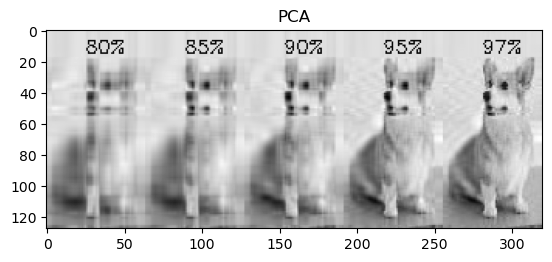

In [ ]:
def PCA_img(percent,img):
    percent = percent/100
    img_pca = PCA(n_components = percent).fit(img)
    transform = img_pca.transform(img)
    pca_img = img_pca.inverse_transform(transform)
    return pca_img

imgs = np.array(cv.imread('./Testing_Image/corgi1.jpg'))
rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
resize_img = cv.resize(rgb,(64,128))
gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
a = PCA_img(80,gray)
b = PCA_img(85,gray)
c = PCA_img(90,gray)
d = PCA_img(95,gray)
e = PCA_img(97,gray)
a = cv.putText(a, '80%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
b = cv.putText(b, '85%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
c = cv.putText(c, '90%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
d = cv.putText(d, '95%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
e = cv.putText(e, '97%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))

add = cv.hconcat([a, b, c, d, e])
plt.title('PCA')
plt.imshow(add,cmap='gray')
plt.show()
    

# PCA + MinMAx

In [20]:
# PCA for Grayscale
X_train_scaled_pca = PCA(n_components=3240).fit(X_train_scaled)

# PCA for Canny Edge 
X_Edge_train_scaled_pca = PCA(n_components=3240).fit(X_Edge_train_scaled)

### Note:
#### Look at the Scree Plot & find n components base on the slowly increasing rate.

Text(0.5, 1.0, 'Scree plot for X Train Grayscale')

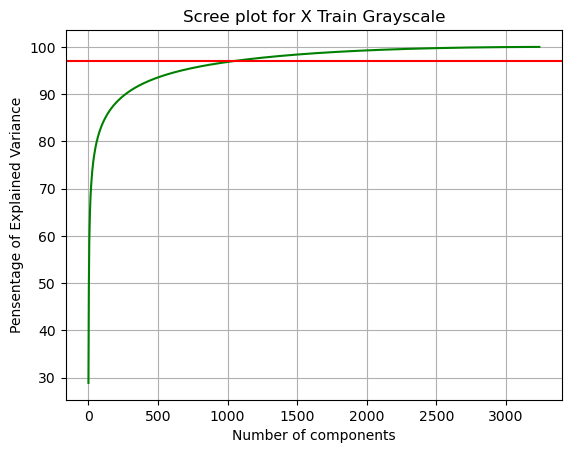

In [21]:
plt.grid()
plt.plot(np.cumsum(X_train_scaled_pca.explained_variance_ratio_ * 100), color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Pensentage of Explained Variance')
plt.title('Scree plot for X Train Grayscale') 

# From the Scree Plot for X train Grayscale, We are choosing from 1250 components
-----------

Text(0.5, 1.0, 'Scree plot for X Train Canny Edge')

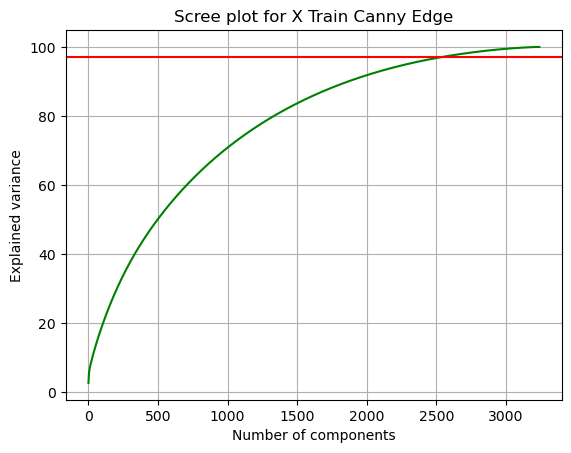

In [22]:
plt.grid()
plt.plot(np.cumsum(X_Edge_train_scaled_pca.explained_variance_ratio_ * 100), color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot for X Train Canny Edge') 

# From the Scree Plot for X train Canny Edge, We are choosing from 2500 components

#

In [23]:
# Set n_components = 1250 based on the observation in Scree Plot
X_train_scaled_pca = PCA(n_components=0.97).fit(X_train_scaled)

# Set n_components = 2500 based on the observation in Scree Plot
X_Edge_train_scaled_pca = PCA(n_components=0.97).fit(X_Edge_train_scaled)

X_train_final = X_train_scaled_pca.transform(X_train_scaled)
X_test_final = X_train_scaled_pca.transform(X_test_scaled)

X_Edge_train_final = X_Edge_train_scaled_pca.transform(X_Edge_train_scaled)
X_Edge_test_final = X_Edge_train_scaled_pca.transform(X_Edge_test_scaled)

----------------
# PCA with HOG


train_hog_b4_norm <br>
train_HSV_b4_norm <br>
test_hog_b4_norm <br>
test_HSV_b4_norm <br>

In [ ]:
# PCA for Grayscale
X_HOG_train_pca = PCA(n_components=3240).fit(train_hog_b4_norm)

# PCA for Canny Edge 
X_HSV_train_pca = PCA(n_components=3240).fit(train_HSV_b4_norm)

Text(0.5, 1.0, 'Scree plot for X Train Hog')

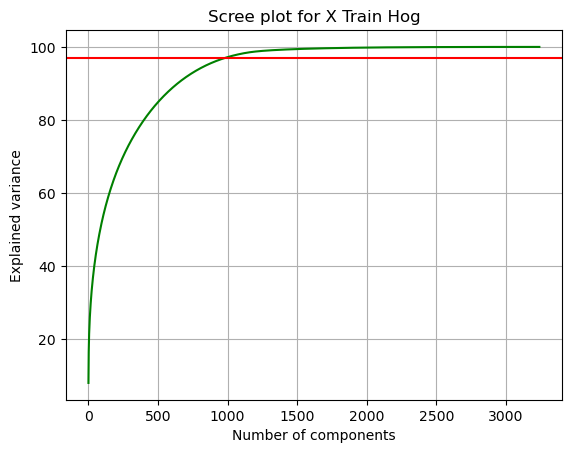

In [ ]:
plt.grid()
plt.plot(np.cumsum(X_HOG_train_pca.explained_variance_ratio_ * 100),color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot for X Train Hog') 

In [24]:
# PCA for Grayscale
X_HOG_train_pca = PCA(n_components=0.97).fit(train_hog_b4_norm)
X_HOG_train_final = X_HOG_train_pca.transform(train_hog_b4_norm)
X_HOG_test_final = X_HOG_train_pca.transform(test_hog_b4_norm)

# StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
# Set n_components = 1250 based on the observation in Scree Plot
X_train_sc_pca = PCA(n_components=0.97).fit(X_train_sc)
X_train_sc_pca = X_train_scaled_pca.transform(X_train_sc)
X_test_sc_pca = X_train_scaled_pca.transform(X_test_sc)

In [32]:
# Training
train_final = pd.DataFrame(X_train_final)
train_final['class'] = y_train_lb
train_hog_final = pd.DataFrame(X_HOG_train_final)
train_hog_final['class'] = y_train_lb
train_Edge_final = pd.DataFrame(X_Edge_train_final)
train_Edge_final['class'] = y_train_lb

# Testing
test_final = pd.DataFrame(X_test_final)
test_final['class'] = y_test_lb
test_hog_final = pd.DataFrame(X_HOG_test_final)
test_hog_final['class'] = y_test_lb
test_Edge_final = pd.DataFrame(X_Edge_test_final)
test_Edge_final['class'] = y_test_lb



In [33]:
# To CSV
train_final.to_csv('X_train_final.csv', index = False)
train_hog_final.to_csv('X_HOG_train_final.csv', index = False)
train_Edge_final.to_csv('X_Edge_train_final.csv', index = False)

test_final.to_csv('X_test_final.csv', index = False)
test_hog_final.to_csv('X_HOG_test_final.csv', index = False)
test_Edge_final.to_csv('X_Edge_test_final.csv', index = False)


-----------
# Load CSV

In [2]:
from sklearn.utils import shuffle

X_train_finalV = pd.read_csv('./ReadyToTrainCSV/X_train_final.csv')
X_train_finalV = shuffle(X_train_finalV)
y_train = X_train_finalV.iloc[:,-1]
X_train_finalV = X_train_finalV.drop('class', axis=1)

X_HOG_train_finalV = pd.read_csv('./ReadyToTrainCSV/X_HOG_train_final.csv')
X_HOG_train_finalV = shuffle(X_HOG_train_finalV)
y_HOG_train = X_HOG_train_finalV.iloc[:,-1]
X_HOG_train_finalV = X_HOG_train_finalV.drop('class', axis=1)

X_test_finalV = pd.read_csv('./ReadyToTrainCSV/X_test_final.csv')
y_test = X_test_finalV.iloc[:,-1]
X_test_finalV = X_test_finalV.drop('class', axis=1)

X_HOG_test_finalV = pd.read_csv('./ReadyToTrainCSV/X_HOG_test_final.csv')
y_HOG_test = X_HOG_test_finalV.iloc[:,-1]
X_HOG_test_finalV = X_HOG_test_finalV.drop('class', axis=1)

In [88]:
X_train_noPCA = pd.read_csv('./CSVBeforePCA/X_HOG_train.csv')
X_test_noPCA = pd.read_csv('./CSVBeforePCA/X_HOG_test.csv')

---------------
# Modeling (KNN,RF,SVM)

# KNN

---------
### Weighted & Uniform KNN: Manhattan vs Euclidean With GrayScale Feature Images

In [36]:
dis_accuray_man = {}
dis_accuray_uw = {}
dis_accuray_man_u = {}
dis_accuray_uu = {}


kVals = np.arange(1,100,1)
for k in kVals:

    # Manhattan Weighted Knn
    model = KNeighborsClassifier(n_neighbors=k,weights = 'distance', p = 1)
    model.fit(X_train_finalV, y_train.values.ravel()) 
    y_pred = model.predict(X_test_finalV)
    score = accuracy_score(y_test,y_pred)
    dis_accuray_man[k] = round(score*100,2)

    # Euclidean Weighted Knn
    model1 = KNeighborsClassifier(n_neighbors=k,weights = 'distance', p = 2)
    model1.fit(X_train_finalV, y_train.values.ravel()) 
    y_pred1 = model1.predict(X_test_finalV)
    score1 = accuracy_score(y_test,y_pred1)
    dis_accuray_uw[k] = round(score1*100,2)

    # Manhattan Uniform Knn
    model2 = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 1)
    model2.fit(X_train_finalV, y_train.values.ravel())
    y_pred2 = model2.predict(X_test_finalV)
    score2 = accuracy_score(y_test,y_pred2)
    dis_accuray_man_u[k] = round(score2*100,2)

    # Euclidean Uniform Knn
    model3 = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2)
    model3.fit(X_train_finalV, y_train.values.ravel())
    y_pred3 = model3.predict(X_test_finalV)
    score3 = accuracy_score(y_test,y_pred3)
    dis_accuray_uu[k] = round(score3*100,2)
    # 10 Fold CV


max_value = max(dis_accuray_man, key=dis_accuray_man.get)
print('Weighted KNN: Manhattan, Best k =',max_value,' Accuracy:' ,dis_accuray_man[max_value])
max_value = max(dis_accuray_uw, key=dis_accuray_uw.get)
print('Weighted KNN: Euclidean, Best k =',max_value,' Accuracy:' ,dis_accuray_uw[max_value])
max_value = max(dis_accuray_man_u, key=dis_accuray_man_u.get)
print('Uniform KNN: Manhattan, Best k =',max_value,' Accuracy:' ,dis_accuray_man_u[max_value])
max_value = max(dis_accuray_uu, key=dis_accuray_uu.get)
print('Uniform KNN: Euclidean, Best k =',max_value,' Accuracy:' ,dis_accuray_uu[max_value])


Weighted KNN: Manhattan, Best k = 1  Accuracy: 45.37
Weighted KNN: Euclidean, Best k = 35  Accuracy: 59.26
Uniform KNN: Manhattan, Best k = 12  Accuracy: 46.3
Uniform KNN: Euclidean, Best k = 37  Accuracy: 60.19


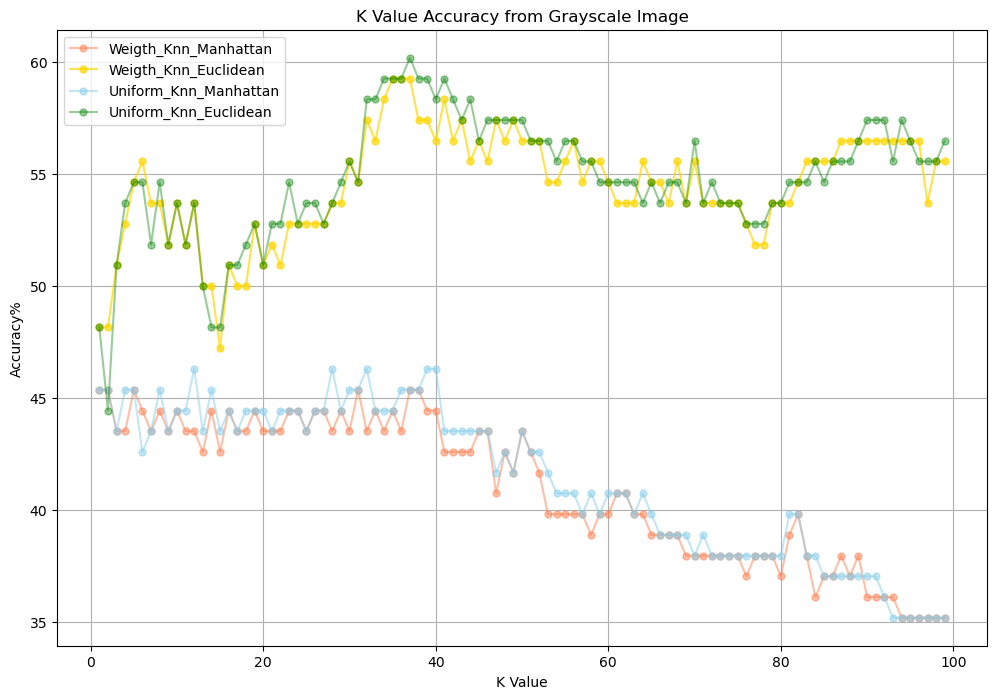

In [38]:
# Plot
names = list(dis_accuray_man.keys())
values = list(dis_accuray_man.values())
names2 = list(dis_accuray_uw.keys())
values2 = list(dis_accuray_uw.values())
names3 = list(dis_accuray_man_u.keys())
values3 = list(dis_accuray_man_u.values())
names4 = list(dis_accuray_uu.keys())
values4 = list(dis_accuray_uu.values())

x_val = range(1,100)
plt.subplots(figsize=(12,8))
plt.plot(x_val, values, color='coral', marker='o', markerfacecolor='coral', markersize=5, label='Weigth_Knn_Manhattan', alpha=0.5)
plt.plot(x_val, values2, color='gold', marker='o',markerfacecolor='gold', markersize=5, label="Weigth_Knn_Euclidean",alpha=0.7)
plt.plot(x_val, values3, color='skyblue', marker='o',markerfacecolor='skyblue', markersize=5, label="Uniform_Knn_Manhattan",alpha=0.5)
plt.plot(x_val, values4, color='green', marker='o',markerfacecolor='green', markersize=5, label="Uniform_Knn_Euclidean",alpha=0.4)
plt.grid()
plt.title('K Value Accuracy from Grayscale Image')
plt.xlabel('K Value')
plt.ylabel('Accuracy%')
plt.legend()

In [4]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
# prepare a range of alpha values to test
param_grid = {'n_neighbors':list(range(1,50)) , 'weights': ['uniform','distance'] , 'p':[2,3]}
grid = GridSearchCV(knn, param_grid, cv = 15 , scoring = 'accuracy', refit=True, verbose = 1, return_train_score = True)
grid.fit(X_train_finalV, y_train.values.ravel())
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 15 folds for each of 196 candidates, totalling 2940 fits
0.8691358024691358
KNeighborsClassifier(n_neighbors=1)


In [5]:
result = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head()

params  mean_test_score  \
2    {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}         0.869136   
3   {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}         0.869136   
7   {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}         0.869136   
15  {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}         0.856481   
11  {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}         0.850000   

    rank_test_score  
2                 1  
3                 1  
7                 1  
15                4  
11                5

In [6]:
grid_pred = grid.predict(X_test_finalV)
cm = confusion_matrix(y_test, grid_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred))

Confusion Matrix : 
 [[14  3 19]
 [ 7 14 15]
 [ 9  3 24]]
              precision    recall  f1-score   support

           0       0.47      0.39      0.42        36
           1       0.70      0.39      0.50        36
           2       0.41      0.67      0.51        36

    accuracy                           0.48       108
   macro avg       0.53      0.48      0.48       108
weighted avg       0.53      0.48      0.48       108



-----------
# SVM

In [9]:
from sklearn.model_selection import GridSearchCV
svm_clf = SVC()
# prepare a range of alpha values to test
param_grid = {'kernel': ['poly', 'rbf', 'linear',],'gamma': [1,0.1,0.01,0.001], 'gamma' :['scale','auto'],'C':[0.1,1,10,100]}
grid = GridSearchCV(svm_clf, param_grid, cv = 5, scoring = 'accuracy', refit=True, verbose = 1, return_train_score = True)
grid.fit(X_train_finalV, y_train.values.ravel())
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.8617283950617285
SVC(C=10)


In [10]:
result = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head()

params  mean_test_score  \
13    {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}         0.861728   
19   {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}         0.860802   
22    {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}         0.855556   
16     {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}         0.854012   
18  {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}         0.844136   

    rank_test_score  
13                1  
19                2  
22                3  
16                4  
18                5

In [11]:
grid_pred = grid.predict(X_test_finalV)
cm = confusion_matrix(y_test, grid_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred, target_names=['Corgi', 'German', 'Golden']))

Confusion Matrix : 
 [[18  4 14]
 [ 2 20 14]
 [ 7  4 25]]
              precision    recall  f1-score   support

       Corgi       0.67      0.50      0.57        36
      German       0.71      0.56      0.63        36
      Golden       0.47      0.69      0.56        36

    accuracy                           0.58       108
   macro avg       0.62      0.58      0.59       108
weighted avg       0.62      0.58      0.59       108



In [ ]:
model = SVC(C= 100, gamma= 'scale', kernel = 'poly'})
model.fit(X_train_finalV, y_train.values.ravel())
grid_pred = grid.predict(X_test_finalV)
cm = confusion_matrix(y_test, grid_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred))

------------
## Random Forest

In [3]:
from sklearn.model_selection import GridSearchCV
rnd_clf = RandomForestClassifier()
# prepare a range of alpha values to test
param_grid = {'n_estimators':[300,400,500], 'max_leaf_nodes': [50,100,200], 'max_depth' :[3,5,10], 'max_features' :['sqrt','log2']}
grid = GridSearchCV(rnd_clf, param_grid, cv =5, scoring = 'accuracy', refit=True, verbose = 1, return_train_score = True)
grid.fit(X_train_finalV, y_train.values.ravel())
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.7910493827160494
RandomForestClassifier(max_depth=10, max_leaf_nodes=200, n_estimators=500)


In [4]:
result = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head()

params  mean_test_score  \
44  {'max_depth': 10, 'max_features': 'sqrt', 'max...         0.791049   
43  {'max_depth': 10, 'max_features': 'sqrt', 'max...         0.790741   
39  {'max_depth': 10, 'max_features': 'sqrt', 'max...         0.786111   
41  {'max_depth': 10, 'max_features': 'sqrt', 'max...         0.783025   
42  {'max_depth': 10, 'max_features': 'sqrt', 'max...         0.783025   

    rank_test_score  
44                1  
43                2  
39                3  
41                4  
42                5

In [5]:
grid_pred = grid.predict(X_test_finalV)
cm = confusion_matrix(y_test, grid_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred, target_names=['Corgi', 'German', 'Golden']))

Confusion Matrix : 
 [[12  5 19]
 [ 4 26  6]
 [ 3  6 27]]
              precision    recall  f1-score   support

       Corgi       0.63      0.33      0.44        36
      German       0.70      0.72      0.71        36
      Golden       0.52      0.75      0.61        36

    accuracy                           0.60       108
   macro avg       0.62      0.60      0.59       108
weighted avg       0.62      0.60      0.59       108



In [86]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=100, max_depth= 100)
rnd_clf.fit(X_HOG_train_finalV,  y_train_lb.values.ravel())
y_pred = rnd_clf.predict(X_HOG_test_finalV)
acc = accuracy_score(y_test_lb, y_pred)
print(acc)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)
n_scores = cross_val_score(rnd_clf, X=X_HOG_train_finalV, y= y_train_lb.values.ravel(), cv=cv, scoring='accuracy')
print("Cross Validation:")
print('Accuracy : ',round(mean(n_scores),3), 'Std: ' , round(std(n_scores),3))

0.48148148148148145
Cross Validation:
Accuracy :  0.615 Std:  0.021


In [87]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=100, max_depth= 100)
rnd_clf.fit(X_train_finalV,  y_train_lb.values.ravel())
y_pred_rf = rnd_clf.predict(X_test_finalV)
print("Accuracy:",accuracy_score(y_test_lb, y_pred_rf))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)
n_scores = cross_val_score(rnd_clf, X_train_finalV,  y_train_lb.values.ravel(), scoring='accuracy', cv=cv)
print("Cross Validation:")
print('Accuracy : ',round( mean(n_scores),3), 'Std: ', round(std(n_scores),3))

Accuracy: 0.6203703703703703
Cross Validation:
Accuracy :  0.798 Std:  0.023
